In [1]:
import keras
import requests
from bs4 import BeautifulSoup as bs
from PIL import Image
from io import BytesIO
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model_threshold = 0.16
model = keras.models.load_model('new_dataset_model.hdf5')

In [3]:
def get_image_data(url):
    r = requests.get(url)
    img = Image.open(BytesIO(r.content))
    img = img.resize((150, 150))
    imshow(img)
    array = np.asarray(img) / 255
    array = array.astype('float32')
    
    return array

def predict_image(url):
    X = get_image_data(url)
    X = np.expand_dims(X, axis=0)
    y = model.predict(X)
    
    prediction = y[0][0]
    if prediction >= model_threshold:
        answer = 'Metal'
    else:
        answer = 'Not Metal'
        
    prob = get_prob(prediction)
        
    return 'Predicted [{}] with {:.2f}% probability'.format(answer, prob*100)

def get_prob(pred):
    if pred <= model_threshold:
        return pred * 0.5 / model_threshold
    else:
        return ((pred - model_threshold) / (1 - model_threshold) / 2) + 0.5
    

'Predicted [Not Metal] with 17.84% probability'

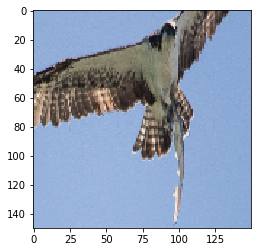

In [6]:
# use this function to predict images

predict_image('https://petapixel.com/assets/uploads/2018/04/altview1-800x490.jpg')

In [7]:
import urllib.parse as urlparse

def get_video_thumbnail_link(url):
    query_string = urlparse.urlparse(url).query
    params = urlparse.parse_qs(query_string)
    video_id = params['v'][0]

    return 'https://img.youtube.com/vi/{}/0.jpg'.format(video_id)

def predict_video(video_link):
    url = get_video_thumbnail_link(video_link)
    return predict_image(url)

'Predicted [Not Metal] with 17.48% probability'

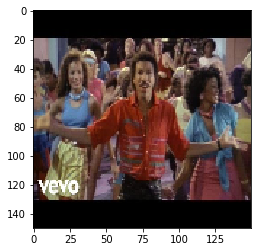

In [8]:
predict_video('https://www.youtube.com/watch?v=nqAvFx3NxUM')

In [11]:
import logging
l = logging.getLogger()
import pandas as pd
df = pd.DataFrame([1,2,3])

In [13]:
l.info(df)

In [10]:
l.info('test')